In [2]:
import pandas as pd

# Load the Superstore dataset
file_path = 'Sample - Superstore.csv'
# Attempt to read the dataset with a different encoding to handle the UnicodeDecodeError
superstore_data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataset to understand its structure
superstore_data.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Select relevant columns for customer segmentation
customer_data = superstore_data[['Customer ID', 'Customer Name', 'Segment', 'Sales', 'Quantity', 'Discount', 'Profit']]

# Aggregate data by customer to calculate metrics for segmentation
customer_grouped = customer_data.groupby(['Customer ID', 'Customer Name', 'Segment']).agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean',
    'Profit': 'sum'
}).reset_index()

# Display the aggregated customer data
customer_grouped


,Customer ID,Customer Name,Segment,Sales,Quantity,Discount,Profit
0,AA-10315,Alex Avila,Consumer,5563.560,30,0.090909,-362.8825
1,AA-10375,Allen Armold,Consumer,1056.390,41,0.080000,277.3824
2,AA-10480,Andrew Allen,Consumer,1790.512,36,0.016667,435.8274
3,AA-10645,Anna Andreadi,Consumer,5086.935,64,0.063889,857.8033
4,AB-10015,Aaron Bergman,Consumer,886.156,13,0.066667,129.3465
...,...,...,...,...,...,...,...
788,XP-21865,Xylona Preis,Consumer,2374.658,100,0.046429,621.2300
789,YC-21895,Yoseph Carroll,Corporate,5454.350,31,0.075000,1305.6290
790,YS-21880,Yana Sorensen,Corporate,6720.444,58,0.050000,1778.2923
791,ZC-21910,Zuschuss Carroll,Consumer,8025.707,105,0.254839,-1032.1490


In [4]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = customer_grouped[['Sales', 'Quantity', 'Discount', 'Profit']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display the scaled features
scaled_features[:5]


array([[ 1.01511197, -0.71530858, -0.74788484, -0.81016078],
       [-0.70059002, -0.27224696, -0.87043891, -0.09373862],
       [-0.4211387 , -0.47363861, -1.58193339,  0.08355286],
       [ 0.83367962,  0.6541546 , -1.05143312,  0.55572131],
       [-0.76539139, -1.40004016, -1.02022722, -0.25938287]])

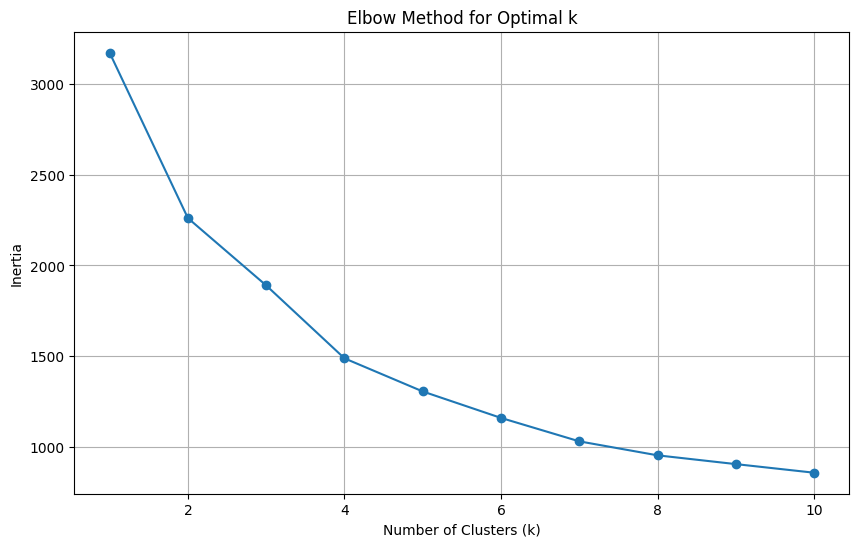

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [6]:
# Set the optimal number of clusters based on the Elbow curve (let's choose k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_grouped['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the customer data with assigned clusters
customer_grouped


,Customer ID,Customer Name,Segment,Sales,Quantity,Discount,Profit,Cluster
0,AA-10315,Alex Avila,Consumer,5563.560,30,0.090909,-362.8825,3
1,AA-10375,Allen Armold,Consumer,1056.390,41,0.080000,277.3824,3
2,AA-10480,Andrew Allen,Consumer,1790.512,36,0.016667,435.8274,3
3,AA-10645,Anna Andreadi,Consumer,5086.935,64,0.063889,857.8033,0
4,AB-10015,Aaron Bergman,Consumer,886.156,13,0.066667,129.3465,3
...,...,...,...,...,...,...,...,...
788,XP-21865,Xylona Preis,Consumer,2374.658,100,0.046429,621.2300,0
789,YC-21895,Yoseph Carroll,Corporate,5454.350,31,0.075000,1305.6290,3
790,YS-21880,Yana Sorensen,Corporate,6720.444,58,0.050000,1778.2923,2
791,ZC-21910,Zuschuss Carroll,Consumer,8025.707,105,0.254839,-1032.1490,0


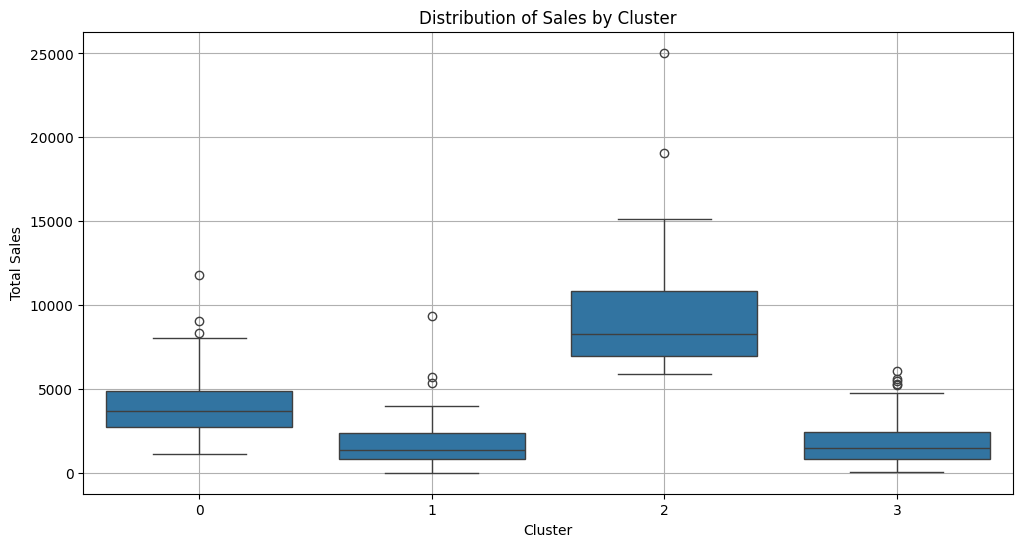

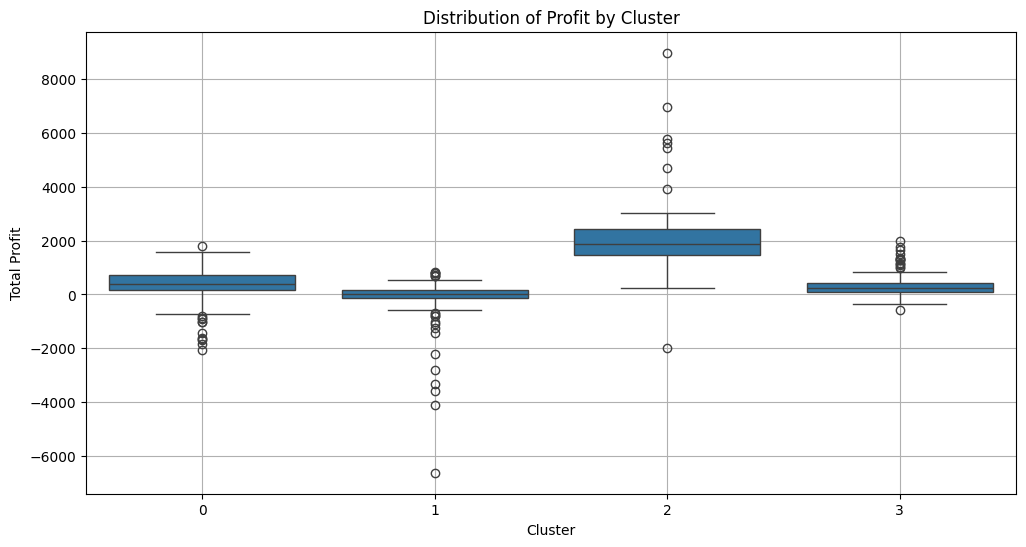

In [7]:
import seaborn as sns

# Visualize the distribution of sales and profit by cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Sales', data=customer_grouped)
plt.xlabel('Cluster')
plt.ylabel('Total Sales')
plt.title('Distribution of Sales by Cluster')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Profit', data=customer_grouped)
plt.xlabel('Cluster')
plt.ylabel('Total Profit')
plt.title('Distribution of Profit by Cluster')
plt.grid(True)
plt.show()


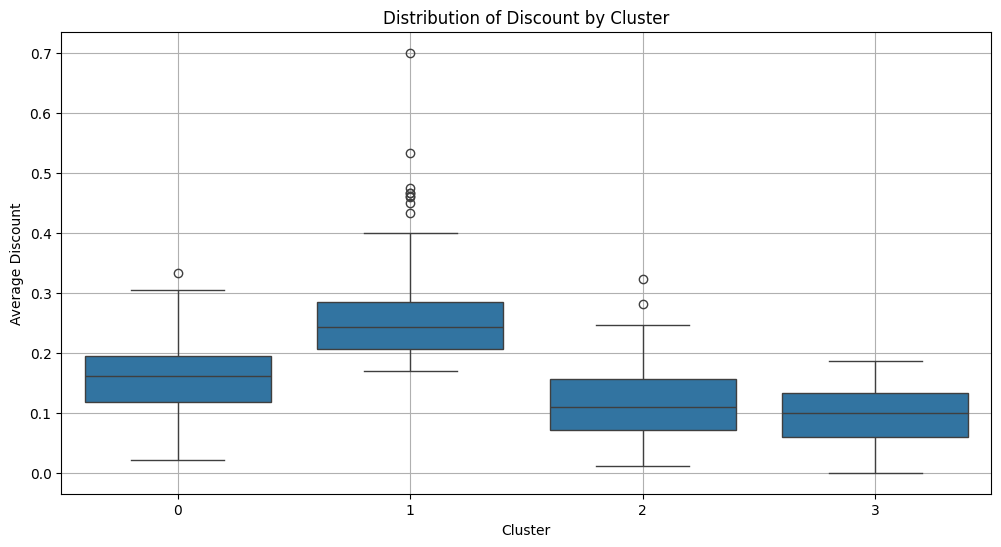

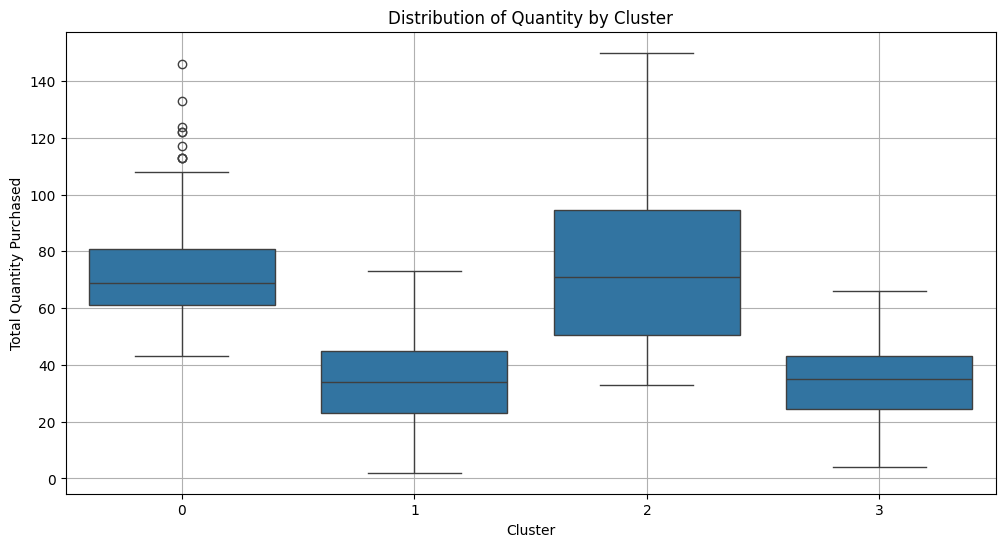

In [8]:
# Visualize the distribution of discount and quantity by cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Discount', data=customer_grouped)
plt.xlabel('Cluster')
plt.ylabel('Average Discount')
plt.title('Distribution of Discount by Cluster')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Quantity', data=customer_grouped)
plt.xlabel('Cluster')
plt.ylabel('Total Quantity Purchased')
plt.title('Distribution of Quantity by Cluster')
plt.grid(True)
plt.show()


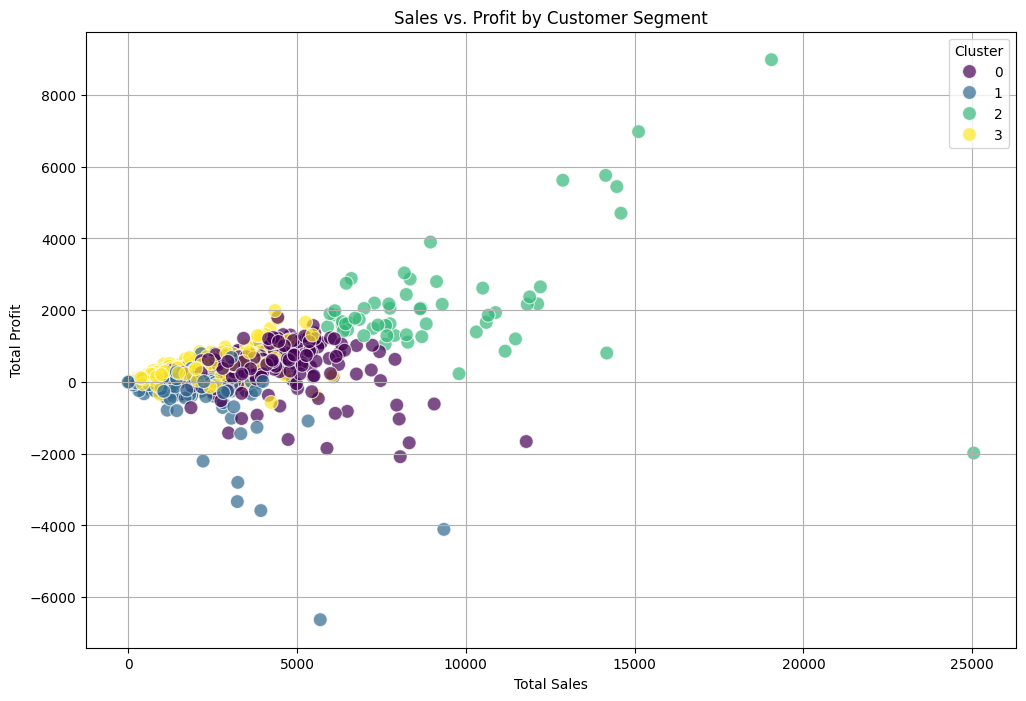

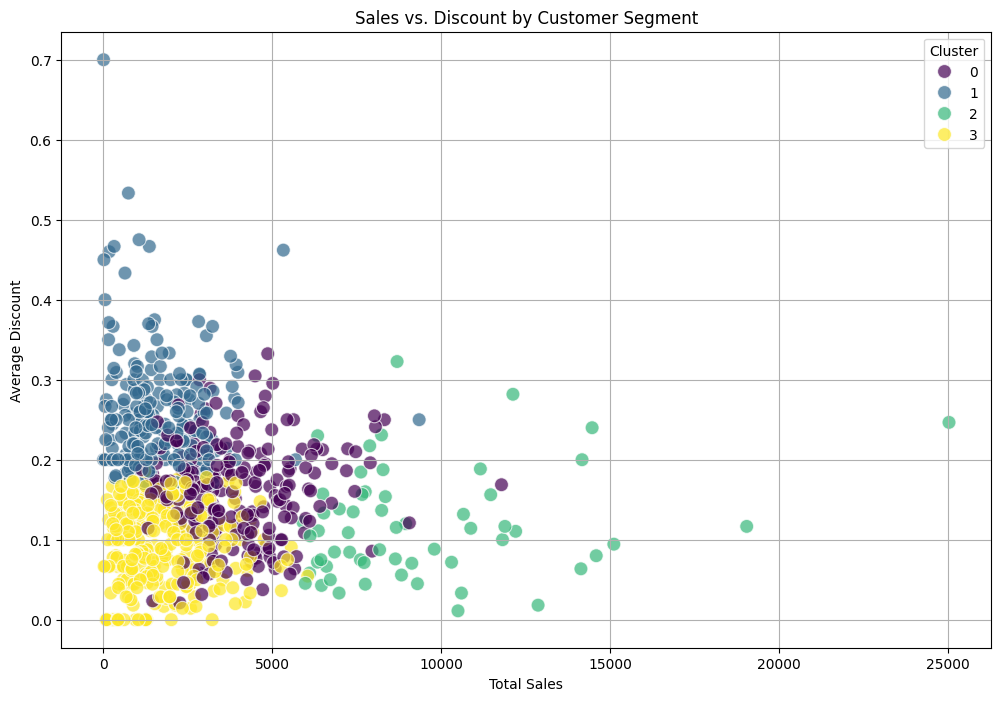

In [9]:
# Scatter plot of Sales vs. Profit colored by Cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Sales', y='Profit', hue='Cluster', data=customer_grouped, palette='viridis', s=100, alpha=0.7)
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.title('Sales vs. Profit by Customer Segment')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

# Scatter plot of Sales vs. Discount colored by Cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Sales', y='Discount', hue='Cluster', data=customer_grouped, palette='viridis', s=100, alpha=0.7)
plt.xlabel('Total Sales')
plt.ylabel('Average Discount')
plt.title('Sales vs. Discount by Customer Segment')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


In [10]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(scaled_features, customer_grouped['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Calculate the Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(scaled_features, customer_grouped['Cluster'])
print(f'Davies-Bouldin Index: {davies_bouldin_avg:.2f}')


Silhouette Score: 0.28
Davies-Bouldin Index: 1.12


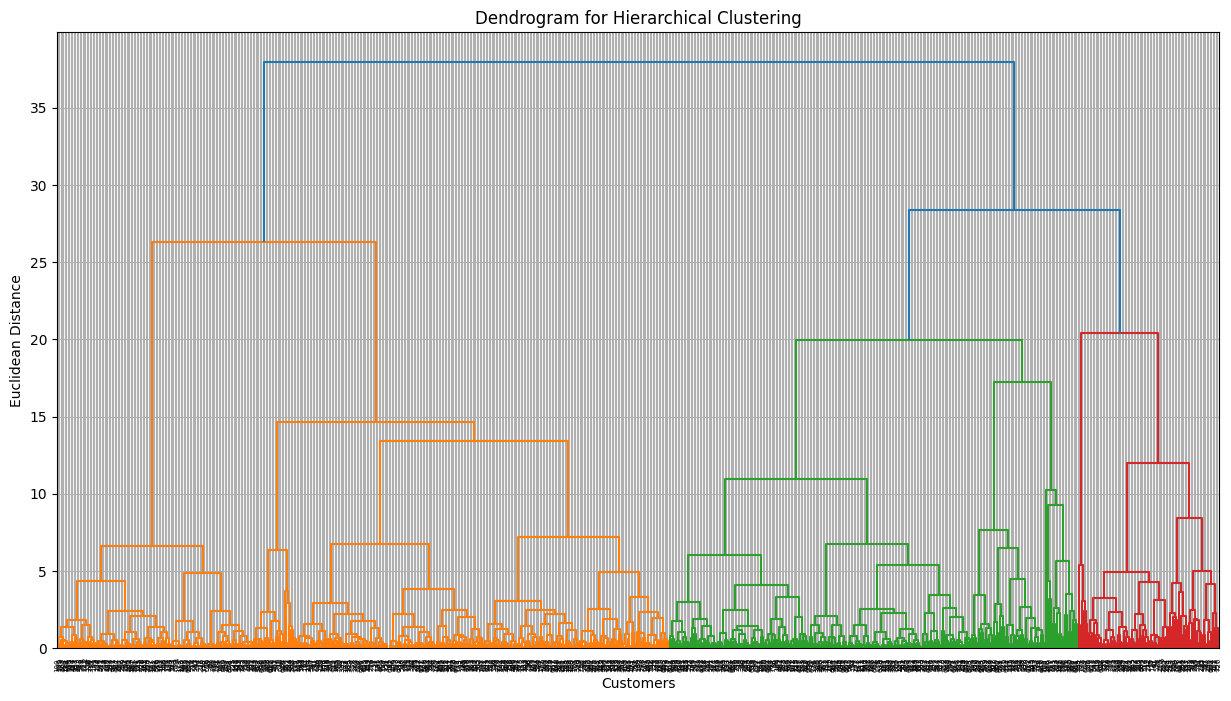

,Customer ID,Customer Name,Segment,Sales,Quantity,Discount,Profit,Cluster,Hierarchical_Cluster
0,AA-10315,Alex Avila,Consumer,5563.560,30,0.090909,-362.8825,3,3
1,AA-10375,Allen Armold,Consumer,1056.390,41,0.080000,277.3824,3,1
2,AA-10480,Andrew Allen,Consumer,1790.512,36,0.016667,435.8274,3,1
3,AA-10645,Anna Andreadi,Consumer,5086.935,64,0.063889,857.8033,0,4
4,AB-10015,Aaron Bergman,Consumer,886.156,13,0.066667,129.3465,3,1
...,...,...,...,...,...,...,...,...,...
788,XP-21865,Xylona Preis,Consumer,2374.658,100,0.046429,621.2300,0,3
789,YC-21895,Yoseph Carroll,Corporate,5454.350,31,0.075000,1305.6290,3,4
790,YS-21880,Yana Sorensen,Corporate,6720.444,58,0.050000,1778.2923,2,4
791,ZC-21910,Zuschuss Carroll,Consumer,8025.707,105,0.254839,-1032.1490,0,3


In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Perform hierarchical clustering using Ward's method
linkage_matrix = linkage(scaled_features, method='ward')

# Plot the dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.grid(True)
plt.show()

# Assign clusters using a threshold on the dendrogram
hierarchical_clusters = fcluster(linkage_matrix, t=4, criterion='maxclust')
customer_grouped['Hierarchical_Cluster'] = hierarchical_clusters

# Display the customer data with assigned hierarchical clusters
customer_grouped


In [12]:
# Calculate the Silhouette Score for Hierarchical Clustering
silhouette_avg_hierarchical = silhouette_score(scaled_features, customer_grouped['Hierarchical_Cluster'])
print(f'Silhouette Score (Hierarchical Clustering): {silhouette_avg_hierarchical:.2f}')

# Calculate the Davies-Bouldin Index for Hierarchical Clustering
davies_bouldin_avg_hierarchical = davies_bouldin_score(scaled_features, customer_grouped['Hierarchical_Cluster'])
print(f'Davies-Bouldin Index (Hierarchical Clustering): {davies_bouldin_avg_hierarchical:.2f}')


Silhouette Score (Hierarchical Clustering): 0.20
Davies-Bouldin Index (Hierarchical Clustering): 1.29


In [13]:
# Step 1: Calculate Recency, Frequency, and Monetary (RFM) metrics for each customer

# Convert 'Order Date' to datetime format
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'], format='%m/%d/%Y')

# Calculate Recency (days since last purchase)
latest_date = superstore_data['Order Date'].max()
customer_recency = superstore_data.groupby('Customer ID')['Order Date'].max().reset_index()
customer_recency['Recency'] = (latest_date - customer_recency['Order Date']).dt.days

# Calculate Frequency (number of orders)
customer_frequency = superstore_data.groupby('Customer ID')['Order ID'].nunique().reset_index()
customer_frequency.columns = ['Customer ID', 'Frequency']

# Calculate Monetary Value (total sales for each customer)
customer_monetary = superstore_data.groupby('Customer ID')['Sales'].sum().reset_index()
customer_monetary.columns = ['Customer ID', 'Monetary']

# Merge the RFM metrics
rfm_data = customer_recency.merge(customer_frequency, on='Customer ID').merge(customer_monetary, on='Customer ID')

# Display the RFM metrics for customers
rfm_data.head()


,Customer ID,Order Date,Recency,Frequency,Monetary
0,AA-10315,2017-06-29,184,5,5563.560
1,AA-10375,2017-12-11,19,9,1056.390
2,AA-10480,2017-04-15,259,4,1790.512
3,AA-10645,2017-11-05,55,6,5086.935
4,AB-10015,2016-11-10,415,3,886.156


In [14]:
# Step 2: Calculate Customer Lifetime Value (CLV) using a simplified formula
# CLV = Average Transaction Value * Purchase Frequency * Customer Lifespan (Assuming 1 year lifespan for simplicity)

# Calculate Average Transaction Value
rfm_data['Avg_Transaction_Value'] = rfm_data['Monetary'] / rfm_data['Frequency']

# Assume a Customer Lifespan of 1 year
customer_lifespan = 1

# Calculate CLV
rfm_data['CLV'] = rfm_data['Avg_Transaction_Value'] * rfm_data['Frequency'] * customer_lifespan

# Display the updated RFM data with CLV
rfm_data.head()


,Customer ID,Order Date,Recency,Frequency,Monetary,Avg_Transaction_Value,CLV
0,AA-10315,2017-06-29,184,5,5563.560,1112.712000,5563.560
1,AA-10375,2017-12-11,19,9,1056.390,117.376667,1056.390
2,AA-10480,2017-04-15,259,4,1790.512,447.628000,1790.512
3,AA-10645,2017-11-05,55,6,5086.935,847.822500,5086.935
4,AB-10015,2016-11-10,415,3,886.156,295.385333,886.156


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 3: Prepare data for CLV prediction
# Use Recency, Frequency, and Monetary as features to predict CLV
X = rfm_data[['Recency', 'Frequency', 'Monetary']]
y = rfm_data['CLV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.00
R-squared: 1.00


In [16]:
# Step 6: Perform RFM segmentation
# Assign scores from 1 to 4 (1 being least favorable and 4 being most favorable) for Recency, Frequency, and Monetary

# Recency Score: Lower recency is better, so invert the score
rfm_data['Recency_Score'] = pd.qcut(rfm_data['Recency'], 4, labels=[4, 3, 2, 1])

# Frequency Score: Higher frequency is better
rfm_data['Frequency_Score'] = pd.qcut(rfm_data['Frequency'], 4, labels=[1, 2, 3, 4])

# Monetary Score: Higher monetary value is better
rfm_data['Monetary_Score'] = pd.qcut(rfm_data['Monetary'], 4, labels=[1, 2, 3, 4])

# Calculate RFM Score by summing Recency, Frequency, and Monetary Scores
rfm_data['RFM_Score'] = rfm_data[['Recency_Score', 'Frequency_Score', 'Monetary_Score']].sum(axis=1).astype(int)

# Display the updated RFM data with RFM Scores
rfm_data[['Customer ID', 'Recency_Score', 'Frequency_Score', 'Monetary_Score', 'RFM_Score']].head()


,Customer ID,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,AA-10315,1,1,4,6
1,AA-10375,4,4,1,9
2,AA-10480,1,1,2,4
3,AA-10645,3,2,4,9
4,AB-10015,1,1,1,3


In [17]:
# Merge K-Means cluster information with RFM data
customer_segments = customer_grouped[['Customer ID', 'Cluster']].merge(rfm_data, on='Customer ID')

# Display the customer data with both K-Means cluster and RFM Score
customer_segments[['Customer ID', 'Cluster', 'RFM_Score']].head()


,Customer ID,Cluster,RFM_Score
0,AA-10315,3,6
1,AA-10375,3,9
2,AA-10480,3,4
3,AA-10645,0,9
4,AB-10015,3,3


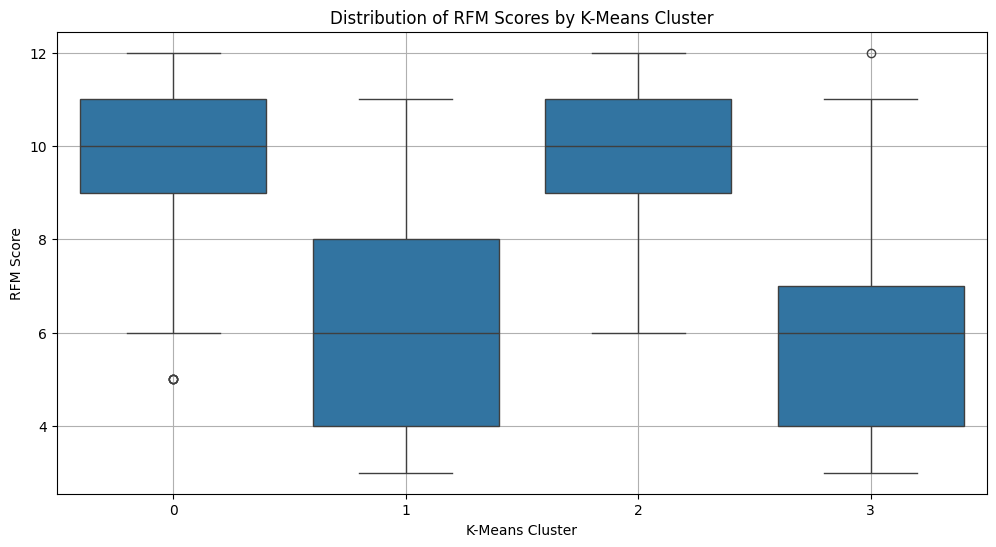

In [18]:
# Analyze the relationship between K-Means clusters and RFM Scores
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot to visualize the distribution of RFM Scores for each K-Means cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='RFM_Score', data=customer_segments)
plt.xlabel('K-Means Cluster')
plt.ylabel('RFM Score')
plt.title('Distribution of RFM Scores by K-Means Cluster')
plt.grid(True)
plt.show()


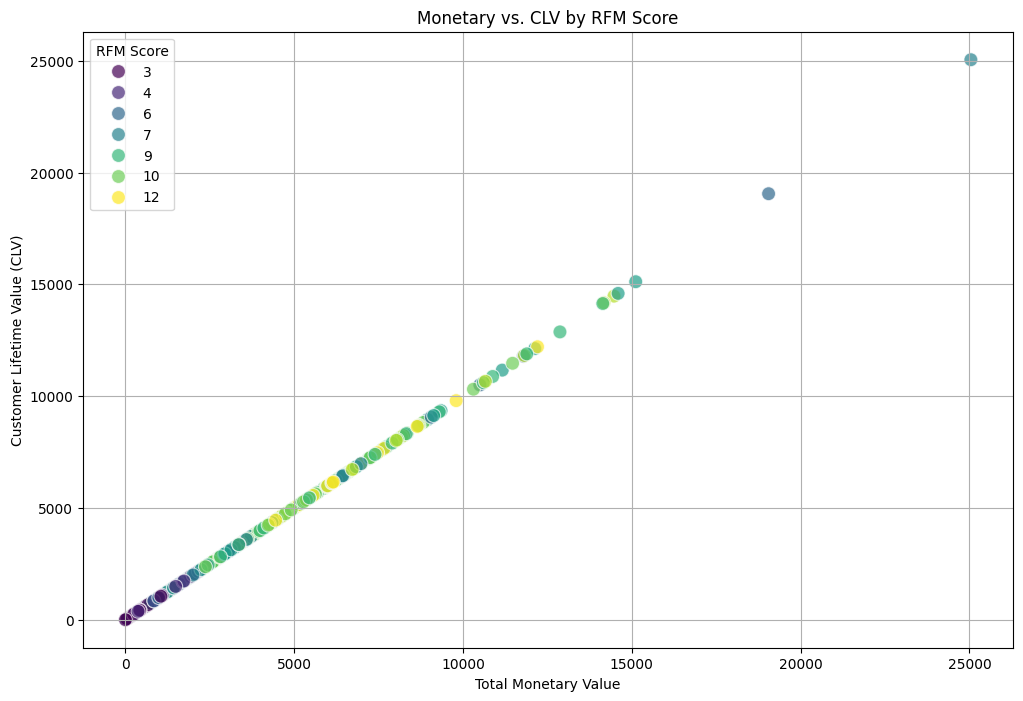

In [19]:
# Scatter Plot of Monetary vs. Profit by RFM Score
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Monetary', y='CLV', hue='RFM_Score', data=customer_segments, palette='viridis', s=100, alpha=0.7)
plt.xlabel('Total Monetary Value')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.title('Monetary vs. CLV by RFM Score')
plt.grid(True)
plt.legend(title='RFM Score')
plt.show()




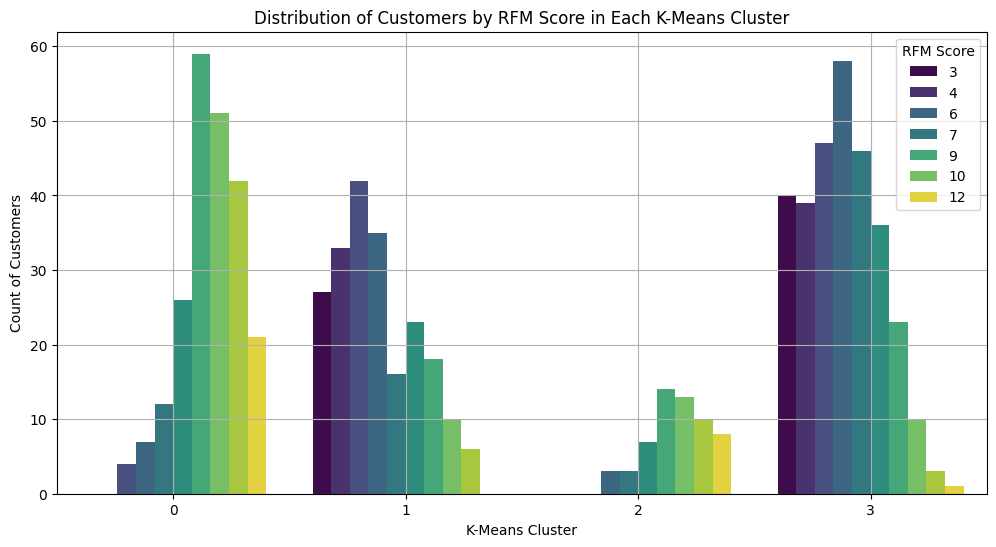

In [20]:
# Bar Plot: Cluster Composition by RFM Score
plt.figure(figsize=(12, 6))
sns.countplot(x='Cluster', hue='RFM_Score', data=customer_segments, palette='viridis')
plt.xlabel('K-Means Cluster')
plt.ylabel('Count of Customers')
plt.title('Distribution of Customers by RFM Score in Each K-Means Cluster')
plt.grid(True)
plt.legend(title='RFM Score')
plt.show()

In [21]:
from sklearn.cluster import DBSCAN
import numpy as np

# Setting parameters for DBSCAN
# eps: maximum distance between two samples for one to be considered as in the neighborhood of the other
# min_samples: minimum number of samples in a neighborhood to consider a point as a core point
dbscan = DBSCAN(eps=1.5, min_samples=5)

# Fitting DBSCAN to the standardized feature set and assigning clusters
# (scaled_features was created previously in this project as the standardized features)
dbscan_labels = dbscan.fit_predict(scaled_features)

# Adding DBSCAN cluster labels to the customer data
customer_grouped['DBSCAN_Cluster'] = dbscan_labels

# Displaying the number of unique clusters formed by DBSCAN (excluding noise points labeled as -1)
unique_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found by DBSCAN (excluding noise): {unique_clusters}")

# Display a sample of the DBSCAN-clustered data
customer_grouped[['Customer ID', 'Sales', 'Profit', 'DBSCAN_Cluster']].head()


Number of clusters found by DBSCAN (excluding noise): 1


,Customer ID,Sales,Profit,DBSCAN_Cluster
0,AA-10315,5563.560,-362.8825,0
1,AA-10375,1056.390,277.3824,0
2,AA-10480,1790.512,435.8274,0
3,AA-10645,5086.935,857.8033,0
4,AB-10015,886.156,129.3465,0
